## Sentiment Analysis

In [1]:
# Install the Textblob library before deploying it
!pip3 install textblob

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
# Import the Patient Experience Data
df_experience = pd.read_csv('./csv/demo_patient_experience_data_NHC.csv')
df_experience.head(4)

,Unnamed: 0,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review
0,0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...
1,1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...
2,2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...
3,3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b..."


In [4]:
# Checking the content of the first review 
df_experience['Review'][0]


"I couldn't have asked for better service from the staff, it was top-notch.. I had a fantastic experience, everything went smoothly and quickly.. The staff's expertise and dedication made my visit truly exceptional.. The staff was outstanding, I couldn't be happier with their service.. The staff was outstanding, I couldn't be happier with their service.. I couldn't have asked for better service from the staff, it was top-notch."

In [5]:
# Using the TextBlob library
TextBlob(df_experience['Review'][0])

TextBlob("I couldn't have asked for better service from the staff, it was top-notch.. I had a fantastic experience, everything went smoothly and quickly.. The staff's expertise and dedication made my visit truly exceptional.. The staff was outstanding, I couldn't be happier with their service.. The staff was outstanding, I couldn't be happier with their service.. I couldn't have asked for better service from the staff, it was top-notch.")

In [6]:
# Sentimental Analysis with TextBlob 
TextBlob(df_experience['Review'][0]).sentiment

Sentiment(polarity=0.58, subjectivity=0.765)

In [7]:
df_experience['Polarity'] = df_experience['Review'].apply(lambda x: TextBlob(x).polarity)
df_experience.head(4)

,Unnamed: 0,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review,Polarity
0,0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...,0.580000
1,1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...,0.262121
2,2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...,0.031506
3,3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b...",0.171875


In [8]:
df_experience['Subjectivity'] = df_experience['Review'].apply(lambda x: TextBlob(x).subjectivity)
df_experience.head(5)

,Unnamed: 0,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review,Polarity,Subjectivity
0,0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...,0.580000,0.765000
1,1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...,0.262121,0.650000
2,2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...,0.031506,0.548752
3,3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b...",0.171875,0.446875
4,4,5,2022-10-31,96,2,1,165,Biopsy,"The service was poor, there are serious improv...",-0.421429,0.650000


In [9]:
df_experience['Sentiment'] = df_experience['Polarity'].apply(lambda x: "Positive" if x>0 else "Neutral" if x==0 else "Negative")
df_experience

,Unnamed: 0,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review,Polarity,Subjectivity,Sentiment
0,0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...,0.580000,0.765000,Positive
1,1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...,0.262121,0.650000,Positive
2,2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...,0.031506,0.548752,Positive
3,3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b...",0.171875,0.446875,Positive
4,4,5,2022-10-31,96,2,1,165,Biopsy,"The service was poor, there are serious improv...",-0.421429,0.650000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19996,2022-09-01,34,3,2,128,CT Scan,"It was okay, the staff's performance was nothi...",0.173214,0.638095,Positive
19996,19996,19997,2022-05-26,80,2,4,84,Blood Test,"I was quite disappointed, and there is a lot o...",-0.194444,0.483333,Negative
19997,19997,19998,2022-11-01,60,2,1,76,Ultrasound,"I was quite disappointed, and there is a lot o...",0.125000,0.515000,Positive
19998,19998,19999,2022-10-09,62,1,5,16,Biopsy,There are no redeeming qualities about the ser...,-0.434091,0.740909,Negative


In [10]:
# Querying the specific sentiment
df_experience.query('Sentiment == "Positive"').head(4)

,Unnamed: 0,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review,Polarity,Subjectivity,Sentiment
0,0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...,0.580000,0.765000,Positive
1,1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...,0.262121,0.650000,Positive
2,2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...,0.031506,0.548752,Positive
3,3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b...",0.171875,0.446875,Positive


In [11]:
# Counting total for each sentiment

sentiment_counts = df_experience['Sentiment'].value_counts()

sentiment_counts

Sentiment
Positive    12740
Negative     7242
Neutral        18
Name: count, dtype: int64

Text(0, 0.5, 'Count')

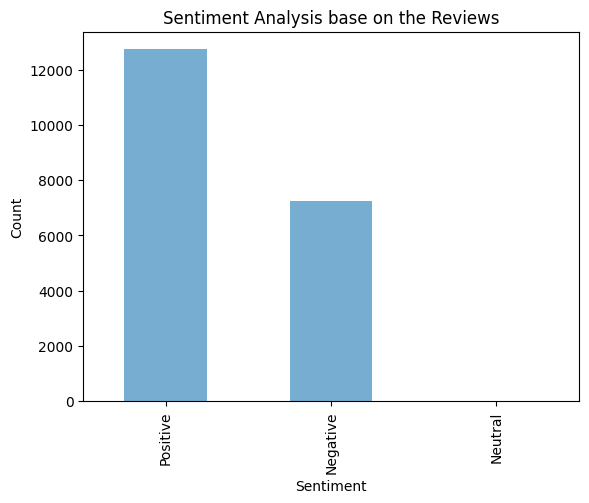

In [16]:
# Visualization the data in Bar graph 
sentiment_counts.plot(kind="bar", alpha=.6)
plt.title('Sentiment Analysis base on the Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
